In [1]:
# importing  the  libraries
import numpy as np
import pandas  as pd  
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
# loading the  dataset
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#label  encoding  

df['Species']=df['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [4]:
# defining the x and y  varibles  
x=df.iloc[:,1:5]
x
y=df.iloc[:,-1]
y


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

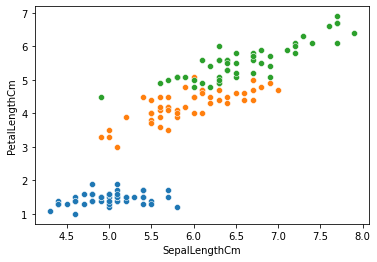

In [5]:
# visulaizing the  clusters  with  two columns
sns.scatterplot(x=df[df['Species']==0]['SepalLengthCm'],y=df[df['Species']==0]['PetalLengthCm'])
sns.scatterplot(x=df[df['Species']==1]['SepalLengthCm'],y=df[df['Species']==1]['PetalLengthCm'])
sns.scatterplot(x=df[df['Species']==2]['SepalLengthCm'],y=df[df['Species']==2]['PetalLengthCm'])



# Finding the  optimal cluster  value  using the  wcss or  elbow method
The Elbow method is one of the most popular ways to find the optimal number of clusters. This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster. The formula to calculate the value of WCSS (for 3 clusters) is given below:


## WCSS(Formula)= ∑Pi in Cluster1 distance(Pi C1)2 +∑Pi in Cluster2distance(Pi C2)2+∑Pi in CLuster3 distance(Pi C3)2

In [6]:
sse=[]
from sklearn.cluster import KMeans
for i in range(1,15):
    model=KMeans(n_clusters=i)
    model.fit(x)
    sse.append(model.inertia_)

C:\Users\slrk4\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\slrk4\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\slrk4\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\slrk4\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

<AxesSubplot:>

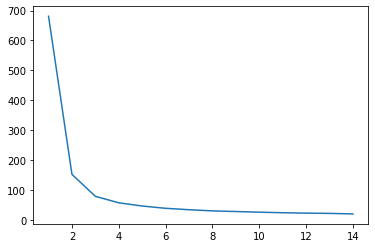

In [7]:
# ploting  the elbow method
sns.lineplot(y=sse,x=np.arange(1,15))

# The optimal cluster  is :3

In [8]:
# model training and prediction
model_final=KMeans(n_clusters=3)
df['cluster']=model_final.fit_predict(x)

C:\Users\slrk4\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
#cluster  centers
model_final.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

C:\Users\slrk4\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

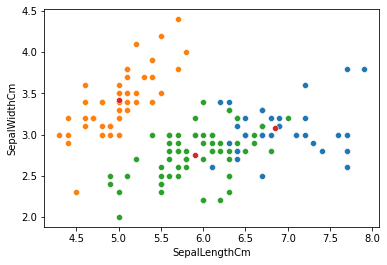

In [10]:
sns.scatterplot(x=df[df['cluster']==0]['SepalLengthCm'],y=df[df['cluster']==0]['SepalWidthCm'])
sns.scatterplot(x=df[df['cluster']==1]['SepalLengthCm'],y=df[df['cluster']==1]['SepalWidthCm'])
sns.scatterplot(x=df[df['cluster']==2]['SepalLengthCm'],y=df[df['cluster']==2]['SepalWidthCm'])
sns.scatterplot(model_final.cluster_centers_[:,0],model_final.cluster_centers_[:,1])